In [1]:
! pip install datasist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


# **Import Python Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datasist.structdata import detect_outliers
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [3]:
df = pd.read_csv("/content/adult_dataset.csv") ## Source : Kaggel >> "https://www.kaggle.com/datasets/uciml/adult-census-income"

# **Exploratory Data Analysis**

In [4]:
df.head() # show first 5 rows as defualt

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info() # Data consist of how many rows and columns? and also missing data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Data Cleaning**

### Checking and Handling for missing values

In [6]:
df.isna().sum() # Check for null values

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [7]:
round(df["workclass"].isna().sum()/df.shape[0]*100,2) # Check the percentage of missing values

np.float64(1.97)

In [8]:
df.dropna(subset=["workclass"],inplace = True) # Drop the missing values

In [9]:
df["workclass"].unique() # Check the unique values

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
df["workclass"].replace("?", "Private", inplace = True)

In [11]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df["occupation"].fillna(df["occupation"].mode()[0], inplace = True)

In [13]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [14]:
df["occupation"].replace("?", df["occupation"].mode()[0], inplace = True)

In [15]:
for col in ["age", "workclass", "education", "education-num", "marital-status",
       "occupation", "relationship", "race", "sex", "capital-gain",
       "capital-loss", "hours-per-week", "native-country", "income"]:
  print(f"{col} : {df[col].unique()}")

age : [ 39  50  38  53  28  37  49  52  31  42  30  23  32  40 102  25  43  54
  35  59  56  19   2  45  22  48  21  24  57  44  41  29  18  47  46  36
  79  27  67  33  34  76  20  17  55 280  61  70  64  71  68  66  51  58
  26  60  90  75  65  14  77  62  63   0  80  72  74  69  73  81  78  88
  82  83  84  85  86  87  89   5   7]
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fi

In [16]:
df.dropna(subset = ["native-country"] , inplace = True)

In [17]:
df["native-country"].replace("?", df["native-country"].mode()[0] , inplace = True)

In [18]:
df["native-country"] = df["native-country"].replace("USA" , "United-States")

In [19]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [20]:
df["native-country"] = df["native-country"].replace("USA" , "United-States")

In [21]:
df["income"] = df["income"].replace(">50K." , ">50K")

In [22]:
df["income"].replace("<=50K.", "<=50K" , inplace = True)

In [23]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

# **Checking for duplicates**

In [24]:
df.duplicated().sum() # Check for duplicate values

np.int64(62)

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.info() # Index doesn't match the number of rows, fix by resetting

<class 'pandas.core.frame.DataFrame'>
Index: 47562 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47562 non-null  int64 
 1   workclass       47562 non-null  object
 2   fnlwgt          47562 non-null  int64 
 3   education       47562 non-null  object
 4   education-num   47562 non-null  int64 
 5   marital-status  47562 non-null  object
 6   occupation      47562 non-null  object
 7   relationship    47562 non-null  object
 8   race            47562 non-null  object
 9   sex             47562 non-null  object
 10  capital-gain    47562 non-null  int64 
 11  capital-loss    47562 non-null  int64 
 12  hours-per-week  47562 non-null  int64 
 13  native-country  47562 non-null  object
 14  income          47562 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [27]:
df.reset_index(drop=True, inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47562 entries, 0 to 47561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47562 non-null  int64 
 1   workclass       47562 non-null  object
 2   fnlwgt          47562 non-null  int64 
 3   education       47562 non-null  object
 4   education-num   47562 non-null  int64 
 5   marital-status  47562 non-null  object
 6   occupation      47562 non-null  object
 7   relationship    47562 non-null  object
 8   race            47562 non-null  object
 9   sex             47562 non-null  object
 10  capital-gain    47562 non-null  int64 
 11  capital-loss    47562 non-null  int64 
 12  hours-per-week  47562 non-null  int64 
 13  native-country  47562 non-null  object
 14  income          47562 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


In [29]:
df_copy = df.copy()

# **Drop unwanted columns**

In [30]:
df.drop("fnlwgt", axis = 1, inplace = True) # Drop fnlwgt column

# **Feature Engineering**

In [31]:
def income_classification(income):
    if income == "<=50K":
        return "Low"
    else:
        return "High"

df["income_classification"] = df["income"].apply(income_classification)

# **Save Cleaned Dataset**

In [117]:
df.to_csv("with_outliers_cleaned_adult_dataset.csv") # save data after cleaning

# **Statistical Summary**

In [33]:
df.describe(include = "number") # Statistical summary of the numeric data

,age,education-num,capital-gain,capital-loss,hours-per-week
count,47562.000000,47562.000000,47562.000000,47562.000000,47562.000000
mean,38.651886,10.091607,1092.383563,87.962470,40.608974
std,13.609436,2.567611,7491.769309,404.249267,12.290475
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,280.000000,16.000000,99999.000000,4356.000000,180.000000


### In Maximum row >> Discovered that "age" and "hours-per-week" columns have outliers.

In [34]:
df.describe(include = "object") # Statistical summary of the object data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,income_classification
count,47562,47562,47562,47562,47562,47562,47562,47562,47562,47562
unique,8,16,7,14,6,5,2,41,2,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,Low
freq,35497,15423,21946,7949,19377,40732,31897,43493,36029,36029


# **Correlation**

<Axes: >

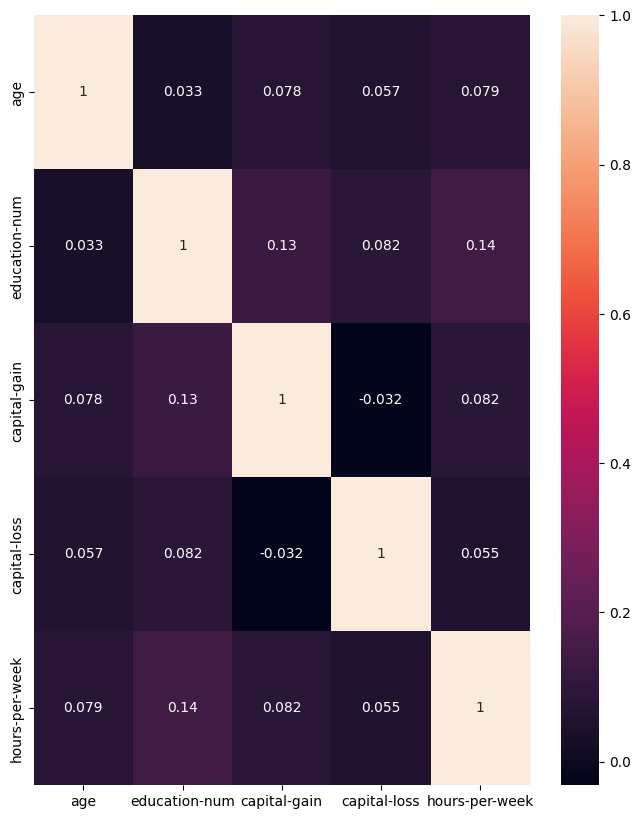

In [35]:
plt.figure(figsize = (8,10))
sns.heatmap(df.select_dtypes(include = np.number).corr(),annot = True)

# **Business Questions**

## Q1- What is the distribution of income levels across different education levels?

In [44]:
grouped = df.groupby("education")["income_classification"].value_counts().sort_values(ascending = False).reset_index(name = "count")
grouped

,education,income_classification,count
0,HS-grad,Low,12951
1,Some-college,Low,8459
2,Bachelors,Low,4599
3,Bachelors,High,3271
4,HS-grad,High,2472
5,Some-college,High,2037
6,11th,Low,1658
7,Assoc-voc,Low,1511
8,Masters,High,1434
9,10th,Low,1251


In [45]:
fig = px.bar(
    grouped,
    x = "education",
    y = "count",
    color = "income_classification",
    barmode = "group",
    title = "Income Distribution by Education Level",
    labels = {"count": "Number of Individuals", "education": "Education Level", "income_classification": "Income"}
)

fig.update_layout(
    xaxis_tickangle = -45,
    xaxis_title = "Education Level",
    yaxis_title = "Count",
    legend_title = "Income",
    height = 600,
    width = 1000
)

fig.show()

## Q2- What is the average age of individuals earning more than $50K?

In [46]:
avg_age_more_50k = round(df[df["income"] == ">50K"]["age"].mean() , 0)
avg_age_more_50k

np.float64(44.0)

## Q3- What is the gender distribution among high-income earners?

In [49]:
gender_distribution_high_income = df[df["income_classification"] == "High"]["sex"].value_counts()
gender_distribution_high_income

,count
sex,
Male,9798
Female,1735


In [50]:
fig = px.pie(
    names = gender_distribution_high_income.index,
    values = gender_distribution_high_income.values,
    title = "Gender Distribution (High Income)"
)

fig.update_traces(textinfo = "percent+label")
fig.update_layout(height = 500, width = 500)

fig.show()


## Q4- Which occupations are most represented among those earning >$50K?

In [51]:
top_occupations_high_income = df[df["income"] == ">50K"]["occupation"].value_counts()
top_occupations_high_income

,count
occupation,
Prof-specialty,2941
Exec-managerial,2895
Sales,1468
Craft-repair,1375
Adm-clerical,764
Transport-moving,479
Tech-support,416
Machine-op-inspct,369
Protective-serv,308


In [52]:
fig = px.bar(
    x = top_occupations_high_income.values,
    y = top_occupations_high_income.index,
    orientation = "h",
    title = "Top Occupations (High Income)"
)

fig.update_layout(height = 600, width = 800, yaxis = dict(autorange = "reversed"))

fig.show()

## Q5- What is the correlation between weekly work hours and income?

In [53]:
df['income_numeric'] = df['income_classification'].apply(lambda x: 1 if x == "High" else 0)
correlation = round(df["hours-per-week"].corr(df["income_numeric"]),2)
correlation

np.float64(0.23)

In [54]:
fig = px.scatter(
    df,
    x = "hours-per-week",
    y = "income_numeric",
    title = f"Income vs Hours per Week (Correlation = {correlation})",
    labels = {"hours-per-week": "Hours per Week", "income_numeric": "Income (0 = <=50K, 1 = >50K)"}
)

fig.update_layout(height = 500, width = 700)
fig.show()

### Their is weak positive correlation

## Q6- Which top 10 countries are most common among high-income individuals?

In [55]:
country_mapping = {
    "United-States": "United States",
    "South": "South Korea",
    "Holand-Netherlands": "Netherlands",
    "Outlying-US(Guam-USVI-etc)": "United States",
    "Trinadad&Tobago": "Trinidad and Tobago",
    "Hong": "Hong Kong",
    "Iran": "Iran, Islamic Republic of",
    "Vietnam": "Viet Nam",
    "Laos": "Lao People's Democratic Republic",
    "Taiwan": "Taiwan, Province of China",
    "Yugoslavia": "Serbia",
    "Scotland": "United Kingdom",
    "England": "United Kingdom"
}

df["native-country"] = df["native-country"].replace(country_mapping)

In [56]:
top_countries_high_income = df[df["income"] == ">50K"]["native-country"].value_counts().reset_index().head(10)
top_countries_high_income

,native-country,count
0,United States,10763
1,Philippines,85
2,Canada,63
3,India,62
4,Germany,58
5,United Kingdom,50
6,Mexico,47
7,China,36
8,Cuba,34
9,Italy,34


In [57]:
fig = px.choropleth(
    top_countries_high_income,
    locations = "native-country",
    locationmode = "country names",
    color = "count",
    color_continuous_scale = "Blues",
    title = "Top 10 Countries with High Income"
)

fig.update_layout(height = 600, width = 1000)
fig.show()


## Q7- Does marital status influence income level?

In [58]:
income_by_marital_status = df.groupby("marital-status")["income_classification"].value_counts().sort_values(ascending = False).reset_index(name="count")
income_by_marital_status

,marital-status,income_classification,count
0,Never-married,Low,14799
1,Married-civ-spouse,Low,12097
2,Married-civ-spouse,High,9849
3,Divorced,Low,5855
4,Separated,Low,1397
5,Widowed,Low,1317
6,Never-married,High,722
7,Divorced,High,666
8,Married-spouse-absent,Low,544
9,Widowed,High,126


In [59]:
fig = px.bar(
    income_by_marital_status,
    x = "marital-status",
    y = "count",
    color = "income_classification",
    barmode = "group",
    title = "Income Classification by Marital Status"
)

fig.update_layout(xaxis_title = "Marital Status", yaxis_title = "Count", height = 500, width = 900)
fig.show()

## Q8- How does education-num relate to income?

In [62]:
avg_education_num_by_income = df.groupby("income_classification")["education-num"].mean()
avg_education_num_by_income

,education-num
income_classification,
High,11.603052
Low,9.607788


In [63]:
fig = px.pie(
    names = avg_education_num_by_income.index,
    values = avg_education_num_by_income.values,
    title = "Average Education Level by Income"
)

fig.update_traces(textinfo = "percent+label")
fig.update_layout(height = 500, width = 500)

fig.show()


## Q9- What is the average work hour per week per workclass?

In [64]:
avg_hours_per_workclass = df.groupby("workclass")["hours-per-week"].mean().sort_values(ascending = False)
avg_hours_per_workclass

,hours-per-week
workclass,
Self-emp-inc,48.610320
Self-emp-not-inc,44.423508
Federal-gov,41.498243
Local-gov,40.903939
Private,39.842043
State-gov,39.167430
Without-pay,33.952381
Never-worked,28.900000


In [65]:
fig = px.bar(
    x = avg_hours_per_workclass.values,
    y = avg_hours_per_workclass.index,
    orientation = "h",
    title = "Average Weekly Work Hours by Workclass")

fig.update_layout(height = 600, width = 800, yaxis = dict(autorange = "reversed"))

fig.show()

## Q10-  Which race groups are most likely to earn above $50K?

In [66]:
race_high_income = df[df["income"] == ">50K"]["race"].value_counts().sort_values(ascending = False).reset_index(name = "count")
race_high_income

,race,count
0,White,10478
1,Black,554
2,Asian-Pac-Islander,397
3,Amer-Indian-Eskimo,55
4,Other,49


In [67]:
fig = px.bar(
    race_high_income,
    x = "race",
    y = "count",
    barmode = "group",
    title = "Income Classification by Race"
)

fig.update_layout(xaxis_title = "race", yaxis_title = "Count", height = 500, width = 900)
fig.show()

## Q11- Which employment types (workclass) are most associated with high income?

In [68]:
workclass_income_counts = df.groupby("workclass")["income_classification"].value_counts().sort_values(ascending = False).reset_index(name = "count")
workclass_income_counts

,workclass,income_classification,count
0,Private,Low,27976
1,Private,High,7521
2,Self-emp-not-inc,Low,2768
3,Local-gov,Low,2200
4,State-gov,Low,1436
5,Self-emp-not-inc,High,1069
6,Self-emp-inc,High,934
7,Local-gov,High,923
8,Federal-gov,Low,868
9,Self-emp-inc,Low,752


In [69]:
fig = px.bar(
    workclass_income_counts,
    x = "workclass",
    y = "count",
    color = "income_classification",
    title = "Income Distribution by Workclass",
    labels = {"count": "Number of People", "workclass": "Workclass", "income_classification": "Income Classification"},
    barmode = "group"
)

fig.update_layout(height = 600, width = 900, xaxis_tickangle = -45)
fig.show()

## Q12- What are the top 5 most common occupations among females?

In [70]:
top_female_occupations = df[df['sex'] == 'Female']['occupation'].value_counts().sort_values(ascending = False).head(5).reset_index(name = "count")
top_female_occupations

,occupation,count
0,Adm-clerical,3748
1,Prof-specialty,3067
2,Other-service,2682
3,Sales,1932
4,Exec-managerial,1739


In [71]:
fig = px.treemap(
    top_female_occupations,
    path = ["occupation"],
    values = "count",
    title = "Top 5 Occupations Among Females"
)

fig.update_layout(height = 500, width = 700)
fig.show()

# **Data Preprocessing**

### Handle Outliers

In [72]:
df["age"].unique()

array([ 39,  50,  38,  53,  28,  37,  49,  52,  31,  42,  30,  23,  32,
        40, 102,  25,  43,  54,  35,  59,  56,  19,   2,  45,  22,  48,
        21,  24,  57,  44,  41,  29,  18,  47,  46,  36,  79,  27,  67,
        33,  34,  76,  20,  17,  55, 280,  61,  70,  64,  71,  68,  66,
        51,  58,  26,  60,  90,  75,  65,  14,  77,  62,  63,   0,  80,
        72,  74,  69,  73,  81,  78,  88,  82,  83,  84,  85,  86,  87,
        89,   5,   7])

In [73]:
from datasist.structdata import detect_outliers

In [74]:
outliers = detect_outliers(df, 0 , ["age"])
outliers

[15,
 73,
 128,
 220,
 428,
 916,
 1038,
 1166,
 1933,
 2301,
 2752,
 2889,
 2904,
 3209,
 3336,
 3535,
 3775,
 3961,
 4068,
 4107,
 4718,
 4832,
 5268,
 5287,
 5366,
 5402,
 5996,
 6169,
 6210,
 6228,
 6435,
 6620,
 6744,
 7477,
 7716,
 7868,
 8172,
 8377,
 8427,
 8518,
 8690,
 8802,
 8959,
 8969,
 9466,
 10119,
 10205,
 10540,
 11094,
 11233,
 11507,
 11527,
 11725,
 11990,
 12445,
 12486,
 12824,
 12969,
 13019,
 13020,
 13288,
 13689,
 13921,
 14097,
 14152,
 14597,
 14704,
 14749,
 14896,
 15348,
 15654,
 15884,
 16294,
 16515,
 16754,
 16893,
 17600,
 18028,
 18132,
 18263,
 18268,
 18404,
 18550,
 18714,
 18821,
 19034,
 19161,
 19169,
 19201,
 19478,
 19484,
 19504,
 19678,
 19736,
 19817,
 20238,
 20410,
 20452,
 20471,
 20472,
 20599,
 20815,
 20869,
 20942,
 21331,
 21488,
 21799,
 21822,
 22206,
 22465,
 22878,
 22881,
 23442,
 23883,
 24010,
 24026,
 24221,
 24263,
 24378,
 24543,
 25146,
 25286,
 25380,
 25994,
 26224,
 26712,
 27776,
 28157,
 28443,
 28700,
 28926,
 2957

In [75]:
df.loc[outliers, 'age'].unique()

array([102,  79, 280,  90,  80,  81,  88,  82,  83,  84,  85,  86,  87,
        89])

In [76]:
df = df.drop(df[(df["age"] < 18) | (df["age"] > 60)].index)
df["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 25, 43, 54,
       35, 59, 56, 19, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47, 46, 36,
       27, 33, 34, 20, 55, 51, 58, 26, 60])

In [118]:
df.to_csv("without_outliers_cleaned_adult_dataset.csv") # save data after cleaning

# **After Droping Outlier**

## Q1- What is the distribution of income levels across different education levels?

In [78]:
grouped = df.groupby("education")["income_classification"].value_counts().sort_values(ascending = False).reset_index(name = "count")
grouped

,education,income_classification,count
0,HS-grad,Low,11970
1,Some-college,Low,8056
2,Bachelors,Low,4367
3,Bachelors,High,3073
4,HS-grad,High,2301
5,Some-college,High,1909
6,Assoc-voc,Low,1433
7,Masters,High,1348
8,11th,Low,1306
9,Assoc-acdm,Low,1125


In [79]:
fig = px.bar(
    grouped,
    x = "education",
    y = "count",
    color = "income_classification",
    barmode = "group",
    title = "Income Distribution by Education Level",
    labels = {"count": "Number of Individuals", "education": "Education Level", "income_classification": "Income"}
)

fig.update_layout(
    xaxis_tickangle = -45,
    xaxis_title = "Education Level",
    yaxis_title = "Count",
    legend_title = "Income",
    height = 600,
    width = 1000
)

fig.show()

## Q2- What is the average age of individuals earning more than $50K?

In [80]:
avg_age_more_50k = round(df[df["income"] == ">50K"]["age"].mean() , 0)
avg_age_more_50k

np.float64(43.0)

## Q3- What is the gender distribution among high-income earners?

In [81]:
gender_distribution_high_income = df[df["income_classification"] == "High"]["sex"].value_counts()
gender_distribution_high_income

,count
sex,
Male,9074
Female,1648


In [82]:
fig = px.pie(
    names = gender_distribution_high_income.index,
    values = gender_distribution_high_income.values,
    title = "Gender Distribution (High Income)"
)

fig.update_traces(textinfo = "percent+label")
fig.update_layout(height = 500, width = 500)

fig.show()

## Q4- Which occupations are most represented among those earning >$50K?

In [83]:
top_occupations_high_income = df[df["income"] == ">50K"]["occupation"].value_counts()
top_occupations_high_income

,count
occupation,
Exec-managerial,2691
Prof-specialty,2663
Sales,1343
Craft-repair,1334
Adm-clerical,717
Transport-moving,450
Tech-support,402
Machine-op-inspct,353
Protective-serv,299


In [84]:
fig = px.bar(
    x = top_occupations_high_income.values,
    y = top_occupations_high_income.index,
    orientation = "h",
    title = "Top Occupations (High Income)"
)

fig.update_layout(height = 600, width = 800, yaxis = dict(autorange = "reversed"))

fig.show()

## Q5- What is the correlation between weekly work hours and income?

In [85]:
correlation = round(df["hours-per-week"].corr(df["income_numeric"]),2)
correlation

np.float64(0.22)

In [86]:
fig = px.scatter(
    df,
    x = "hours-per-week",
    y = "income_numeric",
    title = f"Income vs Hours per Week (Correlation = {correlation})",
    labels = {"hours-per-week": "Hours per Week", "income_numeric": "Income (0 = <=50K, 1 = >50K)"}
)

fig.update_layout(height = 500, width = 700)
fig.show()

## Q6- Which top 10 countries are most common among high-income individuals?

In [87]:
country_mapping = {
    "United-States": "United States",
    "South": "South Korea",
    "Holand-Netherlands": "Netherlands",
    "Outlying-US(Guam-USVI-etc)": "United States",
    "Trinadad&Tobago": "Trinidad and Tobago",
    "Hong": "Hong Kong",
    "Iran": "Iran, Islamic Republic of",
    "Vietnam": "Viet Nam",
    "Laos": "Lao People's Democratic Republic",
    "Taiwan": "Taiwan, Province of China",
    "Yugoslavia": "Serbia",
    "Scotland": "United Kingdom",
    "England": "United Kingdom"
}

df["native-country"] = df["native-country"].replace(country_mapping)

In [88]:
fig = px.choropleth(
    top_countries_high_income,
    locations="native-country",
    locationmode="country names",
    color="count",
    color_continuous_scale="Blues",
    title="Top 10 Countries with High Income"
)

fig.update_layout(height=600, width=1000)
fig.show()


## Q7- Does marital status influence income level?


In [89]:
income_by_marital_status = df.groupby("marital-status")["income_classification"].value_counts().sort_values(ascending = False).reset_index(name = "count")
income_by_marital_status

,marital-status,income_classification,count
0,Never-married,Low,14071
1,Married-civ-spouse,Low,10787
2,Married-civ-spouse,High,9164
3,Divorced,Low,5500
4,Separated,Low,1354
5,Never-married,High,693
6,Widowed,Low,661
7,Divorced,High,631
8,Married-spouse-absent,Low,509
9,Separated,High,93


In [90]:
fig = px.bar(
    income_by_marital_status,
    x = "marital-status",
    y = "count",
    color = "income_classification",
    barmode = "group",
    title = "Income Classification by Marital Status"
)

fig.update_layout(xaxis_title = "Marital Status", yaxis_title = "Count", height = 500, width = 900)
fig.show()

## Q8- How does education-num relate to income?

In [94]:
avg_education_num_by_income = df.groupby("income_classification")["education-num"].mean()
avg_education_num_by_income

,education-num
income_classification,
High,11.610241
Low,9.718489


In [96]:
fig = px.pie(
    names = avg_education_num_by_income.index,
    values = avg_education_num_by_income.values,
    title = "Average Education Level by Income"
)

fig.update_traces(textinfo = "percent+label")
fig.update_layout(height = 500, width = 500)

fig.show()

## Q9- What is the average work hour per week per workclass?

In [98]:
avg_hours_per_workclass = df.groupby("workclass")["hours-per-week"].mean().sort_values(ascending = False)
avg_hours_per_workclass

,hours-per-week
workclass,
Self-emp-inc,49.880546
Self-emp-not-inc,46.154434
Federal-gov,41.827225
Local-gov,41.648329
Private,40.612442
State-gov,39.333874
Without-pay,33.750000
Never-worked,29.875000


In [100]:
fig = px.bar(
    x = avg_hours_per_workclass.values,
    y = avg_hours_per_workclass.index,
    orientation = "h",
    title = "Average Weekly Work Hours by Workclass")

fig.update_layout(height = 600, width = 800, yaxis = dict(autorange = "reversed"))

fig.show()

## Q10-  Which race groups are most likely to earn above $50K?

In [101]:
race_high_income = df[df["income"] == ">50K"]["race"].value_counts().sort_values(ascending = False).reset_index(name="count")
race_high_income

,race,count
0,White,9714
1,Black,530
2,Asian-Pac-Islander,377
3,Amer-Indian-Eskimo,53
4,Other,48


In [102]:
fig = px.bar(
    race_high_income,
    x = "race",
    y = "count",
    barmode = "group",
    title = "Income Classification by Race"
)

fig.update_layout(xaxis_title = "race", yaxis_title = "Count", height = 500, width = 900)
fig.show()

## Q11- Which employment types (workclass) are most associated with high income?

In [103]:
workclass_income_counts = df.groupby("workclass")["income_classification"].value_counts().sort_values(ascending = False).reset_index(name="count")
workclass_income_counts

,workclass,income_classification,count
0,Private,Low,25735
1,Private,High,7073
2,Self-emp-not-inc,Low,2344
3,Local-gov,Low,1985
4,State-gov,Low,1357
5,Self-emp-not-inc,High,926
6,Local-gov,High,887
7,Self-emp-inc,High,818
8,Federal-gov,Low,814
9,Self-emp-inc,Low,647


In [104]:
fig = px.bar(
    workclass_income_counts,
    x = "workclass",
    y = "count",
    color = "income_classification",
    title = "Income Distribution by Workclass",
    labels = {"count": "Number of People", "workclass": "Workclass", "income_classification": "Income Classification"},
    barmode = "group"
)

fig.update_layout(height = 600, width = 900, xaxis_tickangle = -45)
fig.show()

## Q12- What are the top 5 most common occupations among females?

In [105]:
top_female_occupations = df[df['sex'] == 'Female']['occupation'].value_counts().sort_values(ascending = False).head(5).reset_index(name="count")
top_female_occupations

,occupation,count
0,Adm-clerical,3476
1,Prof-specialty,2762
2,Other-service,2412
3,Sales,1722
4,Exec-managerial,1637


In [106]:
fig = px.treemap(
    top_female_occupations,
    path = ["occupation"],
    values = "count",
    title = "Top 5 Occupations Among Females"
)

fig.update_layout(height = 500, width = 700)
fig.show()


In [107]:
df.drop("income", axis = 1, inplace = True) # Drop income column

In [108]:
df.drop("income_classification", axis = 1, inplace = True) # Drop income_classification column

# **Split input and output**

In [109]:
x = df.drop("income_numeric",axis=1)
y = df["income_numeric"]

# **Handle Categorical Data**

In [110]:
X = pd.get_dummies(x,drop_first=True, dtype=int)
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Serbia,native-country_South Korea,"native-country_Taiwan, Province of China",native-country_Thailand,native-country_Trinidad and Tobago,native-country_United Kingdom,native-country_United States,native-country_Viet Nam
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47557,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
47558,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
47559,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
47560,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Split Data into Train and Test**

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

# **Scaling**

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

# **Handle Imbalance Data (Classification)**

In [114]:
y_train.value_counts()

,count
income_numeric,
0,26320
1,8578


In [115]:
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train_scaled,y_train)

In [116]:
y_train_smote.value_counts()

,count
income_numeric,
0,26320
1,26320
